<a href="https://colab.research.google.com/github/Davidospina1000/Data-Integration/blob/main/Reto_Modelos_Borrosos_de_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 5 – Modelos Borrosos

Una empresa del sector palmero ha ido reportando desde el año 2,000 sus pérdidas asociadas a las operaciones del negocio en cinco (5) zonas de estudio, las cuales poseen un total de 100 Ha. cada una. De acuerdo con lo anterior, llevar a cabo lo siguiente para la Zona de Estudio (I):
1.	Construir la matriz de pérdida de acuerdo con las variables aleatorias de frecuencia y severidad.
2.	Llevar a cabo el muestreo de las variables aleatorias de frecuencia y severidad a una confiabilidad del 99,9%.
3.	Llevar cabo la estimación de las distribuciones agregadas de pérdidas para una gestión 1 en 1.
4.	Determinar para ambas distribuciones agregadas de pérdida, el limite de las pérdidas esperadas, el OpVar, el coeficiente de asimetría, así como el promedio de las pérdidas no esperadas.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

Los clusters son: [[10.84       31.95744681 48.69387755 69.15555556 90.02272727]]
Las cualidades son:
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
La base de los conjuntos es:
 [[49.1174018  33.27931669 29.095209   34.21062851 49.86100729]]
Los clusters de severidad son: [[-218.36410213  -82.36850392   30.31832838  101.89540698  210.15364372]]
Las cualidades son:
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
La base de los conjuntos es:
 [[283.36382092 181.36712226 153.19541419 171.08968384 252.28336139]]


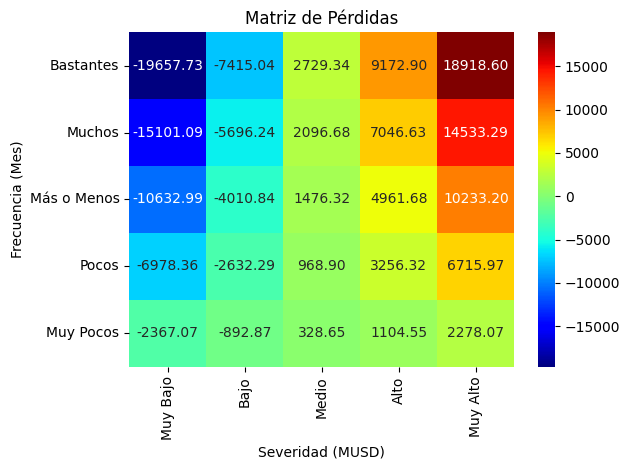

In [ ]:
nxl = '/content/3. Perdida Productividad_Zonas(I).xlsx'
XDB = pd.read_excel(nxl, sheet_name = 0)
XDB.head()

XDB = np.array(XDB[['Frecuencia', 'Severidad']]) #Aquí se definen las variables de trabajo
#''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
# Se inicia el proceso de clusterización de las variables
#''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
np.random.seed(42)
NC=5 #Número de cualidades por variable lingüística

#1. Se procede con la clusterización de los Eventos (Frecuencia (Mes))
from sklearn.cluster import KMeans
mkmf=KMeans(n_clusters=NC, init='random', random_state=42)
mkmf.fit(XDB[:,0].reshape(-1,1))
XCf=mkmf.cluster_centers_
XCf=np.array(sorted(XCf))
print("Los clusters son:", XCf.T)
lbf=['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes'] #Label clusters
print("Las cualidades son:\n", lbf)

# Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmaf = np.zeros((NC,1))

for j in range(NC):
  sigmaf[j,]=np.sum(np.abs(XCf-XCf[j]))/4

print("La base de los conjuntos es:\n", sigmaf.T)

#2. Se hace la clusterización de la severidad (Gasto promedio por Evento)
mkms=KMeans(n_clusters=NC, init='random', random_state=42)
XDB[:,1] = XDB[:,1]/1000
mkms.fit(XDB[:,1].reshape(-1,1))
XCs=mkms.cluster_centers_
XCs=np.array(sorted(XCs))
print("Los clusters de severidad son:", XCs.T)
lbs=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'] #Label clusters
print("Las cualidades son:\n", lbs)

# Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmas = np.zeros((NC,1))

for j in range(NC):
  sigmas[j,]=np.sum(np.abs(XCs-XCs[j]))/4

print("La base de los conjuntos es:\n", sigmas.T)

#3. Se procede con la obtención del mapa de pérdidas - Matriz de Pérdidas
MP=np.outer(XCf,XCs) #Convolución - Multiplicar todo con todo
MP_ordenada = MP[::-1,:]
lbf_ordenada = lbf[::-1]

plt.figure()
sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f')
plt.title('Matriz de Pérdidas')
plt.ylabel('Frecuencia (Mes)')
plt.xlabel('Severidad (MUSD)')
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
plt.tight_layout()
plt.show()


Número de contenedores en tierra 40
Los labels de frecuencia son:
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
Los valores de pertenencia a los conjuntos borrosos son:
 [[0.83842702 0.97122049 0.95633876 0.69547949 0.60456344]]
Pérdida Promedio de contenedores en tierra 30
Los labels de severidad son:
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
Los valores de pertenencia a los conjuntos borrosos son:
 [[0.68105456 0.82536493 0.99999784 0.9154929  0.77494438]]


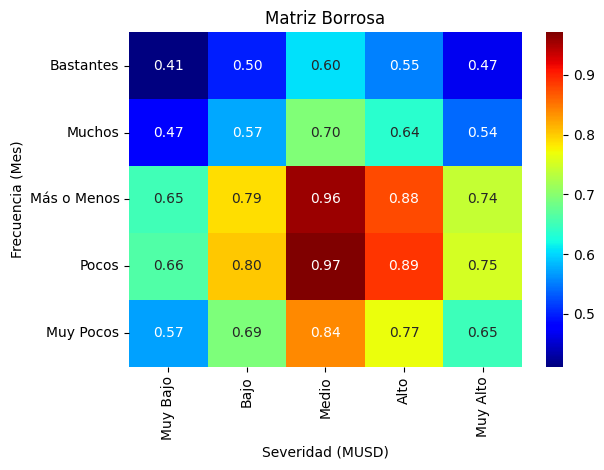

In [ ]:
#3. Se evalúa un solo valor de Frecuencia y Severidad
Xf = 40
VPf=np.exp(-0.5*((XCf-Xf)/sigmaf)**2)
print("Número de contenedores en tierra",Xf)
print("Los labels de frecuencia son:\n",lbf)
print("Los valores de pertenencia a los conjuntos borrosos son:\n",VPf.T)

Xs = 30
VPs=np.exp(-0.5*((XCs-Xs)/sigmas)**2)
print("Pérdida Promedio de contenedores en tierra",Xs)
print("Los labels de severidad son:\n",lbs)
print("Los valores de pertenencia a los conjuntos borrosos son:\n",VPs.T)

#Se procede con la construcción de la matriz de pertenencia - matriz borrosa
MB = np.outer(VPf,VPs);
MB_ordenada = MB[::-1,:]
lbf_ordenada = lbf[::-1]

plt.figure()
sns.heatmap(MB_ordenada, annot=True, cmap='jet', fmt='.2f')
plt.title('Matriz Borrosa')
plt.ylabel('Frecuencia (Mes)')
plt.xlabel('Severidad (MUSD)')
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
plt.tight_layout()
plt.show()


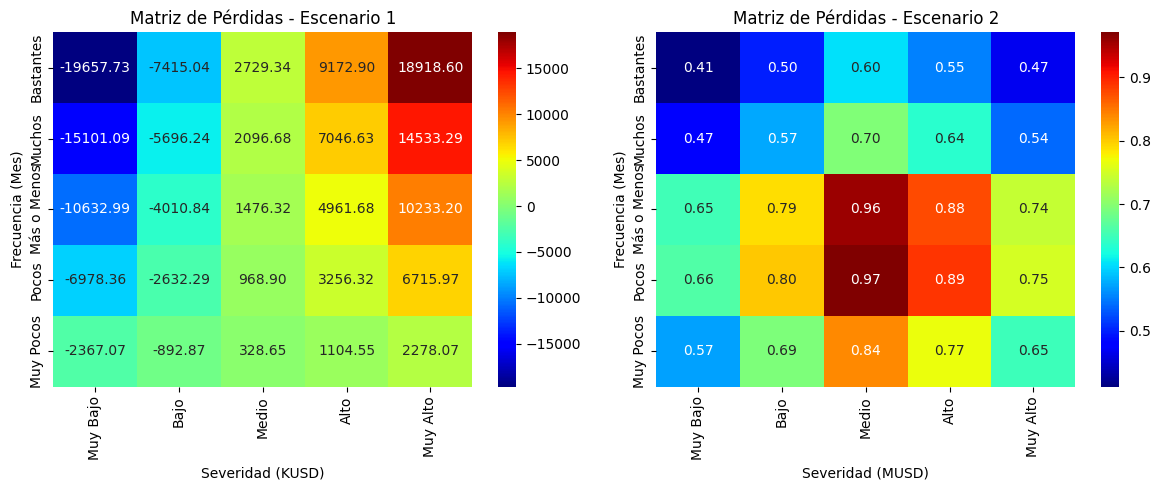

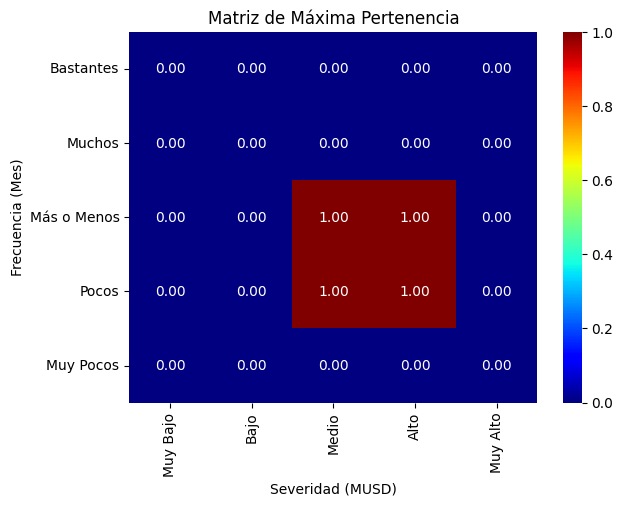

La pérdida matemática es: 1200
La pérdida borrosa es: 2597.9653390311973


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer heatmap
sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f', ax=axes[0])
axes[0].set_title('Matriz de Pérdidas - Escenario 1')
axes[0].set_ylabel('Frecuencia (Mes)')
axes[0].set_xlabel('Severidad (KUSD)')
axes[0].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[0].set_yticklabels(lbf_ordenada)
axes[0].set_xticks(np.arange(len(lbs)) + 0.5)
axes[0].set_xticklabels(lbs, rotation=90)

# Segundo heatmap
sns.heatmap(MB_ordenada, annot=True, cmap='jet', fmt='.2f', ax=axes[1])
axes[1].set_title('Matriz de Pérdidas - Escenario 2')
axes[1].set_ylabel('Frecuencia (Mes)')
axes[1].set_xlabel('Severidad (MUSD)')
axes[1].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[1].set_yticklabels(lbf_ordenada)
axes[1].set_xticks(np.arange(len(lbs)) + 0.5)
axes[1].set_xticklabels(lbs, rotation=90)

plt.tight_layout()
plt.show()

# Se procede a la estimación de la pérdida
VMB=np.array(sorted(MB.flatten(), reverse=True)) #Organiza de menor a mayor los valores de p
MT=np.zeros((5,5))

for i in range(4): #Digame donde están los valores de pertenencia más grnades
  MT[np.where(MB==VMB[i])]=1

MT_ordenada = MT[::-1,:]
lbf_ordenada = lbf[::-1]

plt.figure()
sns.heatmap(MT_ordenada, annot=True, cmap='jet', fmt='.2f')
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
plt.tight_layout()
plt.title('Matriz de Máxima Pertenencia')
plt.ylabel('Frecuencia (Mes)')
plt.xlabel('Severidad (MUSD)')
plt.show()

# Se procede con el cálculo de la pérdida
print("La pérdida matemática es:", Xf*Xs)
XLDAm=np.sum(MP*MB*MT)/np.sum(MB*MT)
print("La pérdida borrosa es:", XLDAm)

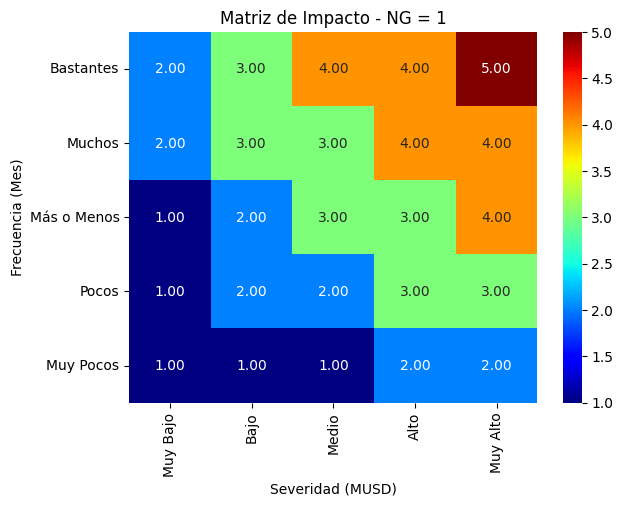

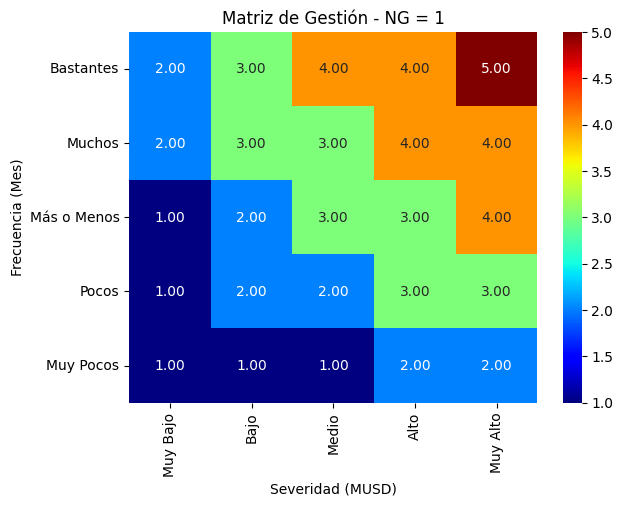

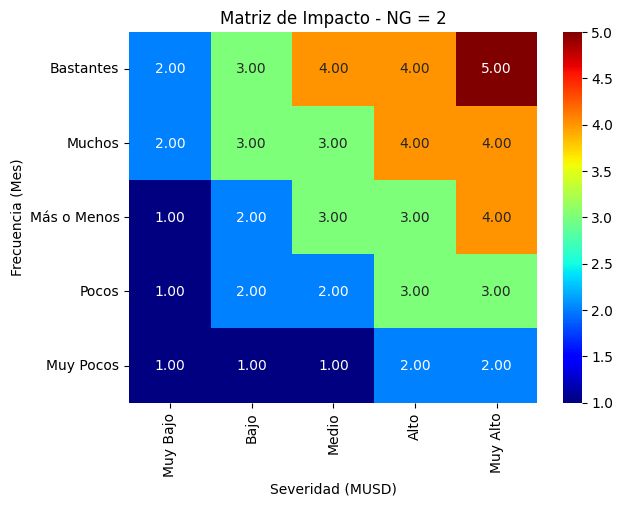

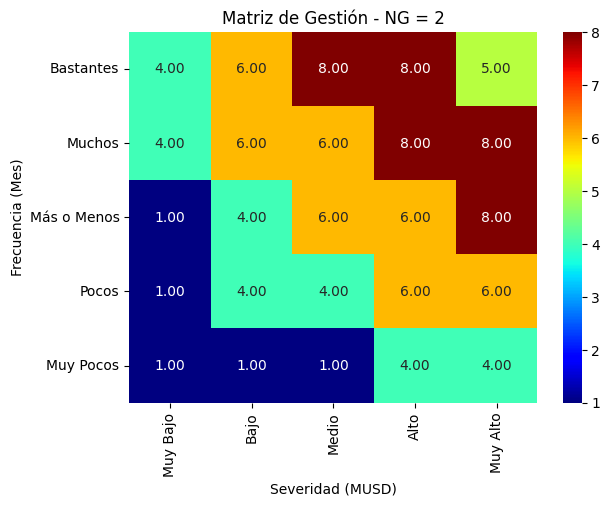

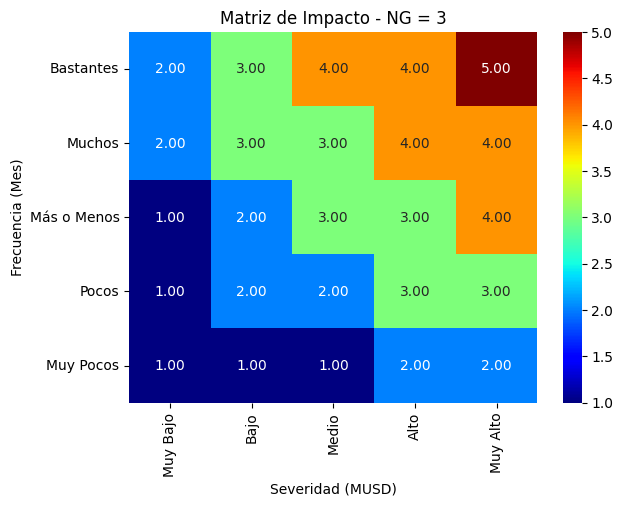

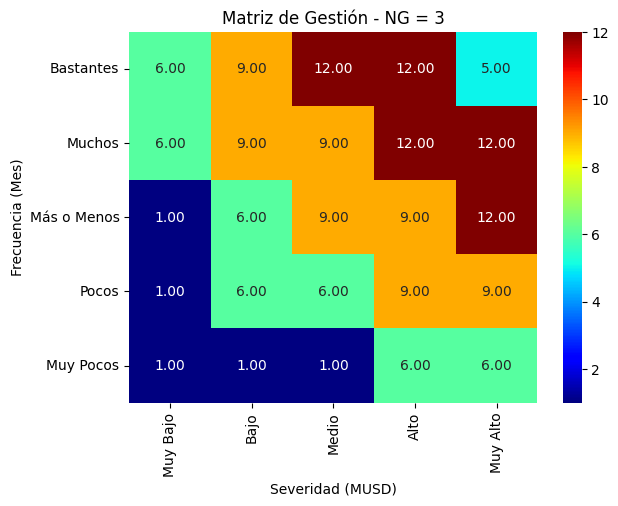

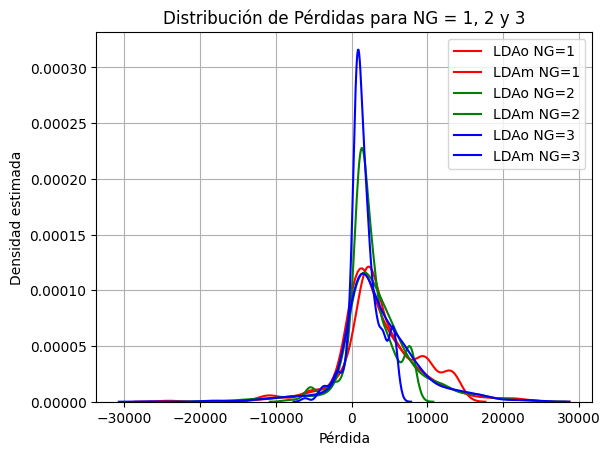

In [ ]:
dff=pd.DataFrame(XDB[:,0]) #DataFrame de Frecuencia
dfs=pd.DataFrame(XDB[:,1]) #DataFrame de Severidad
tabla_metricas = []

# LDA ORIGINAL (sin gestión)
Xfm = np.array(dff.sample(n=1000, replace=True))
Xsm = np.array(dfs.sample(n=1000, replace=True))
XLDA_original = Xfm * Xsm

# MATRIZ DE IMPACTO
MI = np.array([[1, 1, 1, 2, 2],
               [1, 2, 2, 3, 3],
               [1, 2, 3, 3, 4],
               [2, 3, 3, 4, 4],
               [2, 3, 4, 4, 5]])

MI_ordenada = MI[::-1, :]

# Diccionarios para almacenar resultados por nivel de gestión
XLDA_all = {}
XLDAm_all = {}

colores = {1: 'red', 2: 'green', 3: 'blue'}

for NG in [1, 2, 3]:
    # Crear matriz de gestión
    MG = MI.astype(float).copy()
    MG[(MG > 1) & (MG < 5)] *= NG
    MG_ordenada = MG[::-1, :]

    # Muestreo
    Xfm = np.array(dff.sample(n=1000, replace=True))
    Xsm = np.array(dfs.sample(n=1000, replace=True))

    # Inicializar matrices de pérdidas
    XLDA = np.zeros((1000, 1))
    XLDAm = np.zeros((1000, 1))

    for k in range(1000):
        VPf = np.exp(-0.5 * ((XCf - Xfm[k]) / sigmaf) ** 2)
        VPs = np.exp(-0.5 * ((XCs - Xsm[k]) / sigmas) ** 2)
        MB = np.outer(VPf, VPs)
        VMB = np.array(sorted(MB.flatten(), reverse=True))
        MT = np.zeros((5, 5))
        for i in range(4):
            MT[np.where(MB == VMB[i])] = 1
        XLDAm[k] = np.sum(MP * MB * MT * MI) / np.sum(MB * MT * MG)
        XLDA[k] = Xfm[k] * Xsm[k]

    # Guardar resultados
    XLDA_all[NG] = XLDA.flatten()
    XLDAm_all[NG] = XLDAm.flatten()


    # Calcular estadísticas
    u = np.mean(XLDAm)
    OpVar = np.percentile(XLDAm, 99.9)
    PNE = (u + OpVar) / 2
    asimetria = scipy.stats.skew(XLDAm.flatten())

    # Agregar fila de métricas a la tabla
    tabla_metricas.append({'NG': NG,
        'u (Esperadas)': round(u, 2),
        'OpVar (99.9%)': round(OpVar, 2),
        'PNE': round(PNE, 2),
        'Asimetría': round(asimetria, 2)})

    # Mostrar heatmap
    plt.figure()
    sns.heatmap(MI_ordenada, annot=True, cmap='jet', fmt='.2f')
    plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
    plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
    plt.tight_layout()
    plt.title(f'Matriz de Impacto - NG = {NG}')
    plt.xlabel('Severidad (MUSD)')
    plt.ylabel('Frecuencia (Mes)')
    plt.show()

    plt.figure()
    sns.heatmap(MG_ordenada, annot=True, cmap='jet', fmt='.2f')
    plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
    plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
    plt.tight_layout()
    plt.title(f'Matriz de Gestión - NG = {NG}')
    plt.xlabel('Severidad (MUSD)')
    plt.ylabel('Frecuencia (Mes)')
    plt.show()

# Graficar todas las curvas
plt.figure()
for NG in [1, 2, 3]:
    sns.kdeplot(x=XLDA_all[NG], fill=False, color=colores[NG], label=f'LDAo NG={NG}')
    sns.kdeplot(x=XLDAm_all[NG], fill=False, linestyle='-', color=colores[NG], label=f'LDAm NG={NG}')

plt.title('Distribución de Pérdidas para NG = 1, 2 y 3')
plt.xlabel('Pérdida')
plt.ylabel('Densidad estimada')
plt.legend()
plt.grid()
plt.show()

# Guardar resultados
XLDA_all["Original"] = XLDA_original.flatten()

# Calcular estadísticas de la LDA original
u0 = np.mean(XLDA_original)
OpVar0 = np.percentile(XLDA_original, 99.9)
PNE0 = (u0 + OpVar0) / 2
asimetria0 = scipy.stats.skew(XLDA_original.flatten())

# Agregar fila de métricas
tabla_metricas.insert(0, {
    'NG': 'Original',
    'u (Esperadas)': round(u0, 2),
    'OpVar (99.9%)': round(OpVar0, 2),
    'PNE': round(PNE0, 2),
    'Asimetría': round(asimetria0, 2)
})


In [ ]:
df_metricas = pd.DataFrame(tabla_metricas)
df_metricas



,NG,u (Esperadas),OpVar (99.9%),PNE,Asimetría
0,Original,3429.22,24010.60,13719.91,0.22
1,1,3919.39,13924.29,8921.84,-0.23
2,2,2253.45,8543.02,5398.23,-0.16
3,3,1578.43,6258.10,3918.27,-0.09


## Análisis de resultados

La implementación de matrices de gestión para mitigar los riesgos en los cultivos del sector palmero demuestra un impacto claro en la reducción del perfil de pérdidas. Al comparar la distribución original (sin gestión) con los escenarios con niveles de gestión 1:1, 1:2 y 1:3, se evidencia que las pérdidas esperadas (u), las pérdidas catastróficas (OpVar al 99.9%) y las pérdidas no esperadas (PNE) disminuyen progresivamente con una mayor intervención.

En el escenario sin gestión, las pérdidas esperadas ascienden a 3,429.22 MUSD y el OpVar alcanza los 24,010.60 MUSD, con una asimetría positiva de 0.22, lo que sugiere una alta probabilidad de pérdidas extremas. En contraste, al aplicar una gestión 1:3, las pérdidas esperadas se reducen a 1,578.43 MUSD, el OpVar baja a 6,258.10 MUSD, y la asimetría disminuye a -0.09. Este cambio hacia una distribución más simétrica o incluso sesgada hacia pérdidas menores indica una mayor estabilidad y control del riesgo.

La reducción constante de la PNE, desde 13,719.91 MUSD en el escenario original hasta 3,918.27 MUSD con gestión 1:3, refuerza la efectividad de estas medidas. Desde el punto de vista del aseguramiento, estas matrices son especialmente valiosas, ya que logran contener tanto eventos frecuentes como catastróficos dentro de rangos más gestionables, alineándose con el horizonte anual de cobertura de una póliza. En resumen, mayores niveles de gestión conducen a un entorno más asegurable y menos expuesto a pérdidas severas, lo cual se ve reflejado gráficamente en curvas cada vez más esbeltas.